<h1>IMPORTS</h1>

In [1]:
from nbodykit.lab import *
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from nbodykit.source import catalog
from nbodykit import CurrentMPIComm
from nbodykit.algorithms.paircount_tpcf.estimators import LandySzalayEstimator
import logging
from nbodykit.binned_statistic import BinnedStatistic

#from nbodykit.source import estimators



<h1>LOAD DATA</h1>
<h3>Along with some overall diagonstics/statistics about the data</h3>

In [17]:
# Converting to nbodykit ArrayCatalog

###############################################################################
#LOAD VOIDS
voids = np.loadtxt('1024box_masszobov-Voids_cat.txt').T
#voids = np.load('Voids_No_Outliers_1_25_10.npy').T
voids_rand = np.load('voids_random_mass.npy').T

#LOAD HALOS
#halos = np.load('Trial_PP_halo_catalog_1024Mpc_n2048.npy').T
#halos_rand = np.load('halos_random.npy')

halos_bin1 = np.load('HaloMassBin1.npy').T
halos_bin_1_rand = np.load('HaloMassBin1Random.npy').T
halos_bin2 = np.load('HaloMassBin2.npy').T
halos_bin_2_rand = np.load('HaloMassBin2Random.npy').T
halos_bin3 = np.load('HaloMassBin3.npy').T
halos_bin_3_rand = np.load('HaloMassBin3Random.npy').T
halos_bin4 = np.load('HaloMassBin4.npy').T
halos_bin_4_rand = np.load('HaloMassBin4Random.npy').T

###############################################################################
#INITIALIZE DICTIONARY
#VOIDS
void_dict = {}
void_dict_rand = {}

#HALOS
#halo_dict = {}
#halo_dict_rand = {}
halo_dict_1 = {}
halo_dict_1_rand = {}
halo_dict_2 = {}
halo_dict_2_rand = {}
halo_dict_3 = {}
halo_dict_3_rand = {}
halo_dict_4 = {}
halo_dict_4_rand = {}

###############################################################################
#SPECIFY COLUMNS
#VOIDS
void_dict['Position'] = voids[1:4].T
void_dict_rand['Position'] = voids_rand[0:3].T

#HALOS
#halo_dict['Position'] = halos[0:3].T
#halo_dict_rand['Position'] = halos_rand[0:3].T
halo_dict_1['Position'] = halos_bin1[0:3].T
halo_dict_1_rand['Position'] = halos_bin_1_rand[0:3].T
halo_dict_2['Position'] = halos_bin2[0:3].T
halo_dict_2_rand['Position'] = halos_bin_2_rand[0:3].T
halo_dict_3['Position'] = halos_bin3[0:3].T
halo_dict_3_rand['Position'] = halos_bin_3_rand[0:3].T
halo_dict_4['Position'] = halos_bin4[0:3].T
halo_dict_4_rand['Position'] = halos_bin_4_rand[0:3].T

###############################################################################
#MAKE CATALOGUE
#VOIDS
void_cat = catalog.ArrayCatalog(void_dict)
void_cat_rand = catalog.ArrayCatalog(void_dict_rand)

#HALOS
#halo_cat = catalog.ArrayCatalog(halo_dict)
#halo_cat_rand = catalog.ArrayCatalog(halo_dict_rand)
halo_cat_1 = catalog.ArrayCatalog(halo_dict_1)
halo_cat_1_rand = catalog.ArrayCatalog(halo_dict_1_rand)
halo_cat_2 = catalog.ArrayCatalog(halo_dict_2)
halo_cat_2_rand = catalog.ArrayCatalog(halo_dict_2_rand)
halo_cat_3 = catalog.ArrayCatalog(halo_dict_3)
halo_cat_3_rand = catalog.ArrayCatalog(halo_dict_3_rand)
halo_cat_4 = catalog.ArrayCatalog(halo_dict_4)
halo_cat_4_rand = catalog.ArrayCatalog(halo_dict_4_rand)

###############################################################################
#OUTPUT DATA STATS
#VOIDS
print(void_cat)
print(void_cat_rand)

#HALOS
#print(halo_cat)
#print(halo_cat_rand)

print(halo_cat_1)
print(halo_cat_1_rand)
print(halo_cat_2)
print(halo_cat_2_rand)
print(halo_cat_3)
print(halo_cat_3_rand)
print(halo_cat_4)
print(halo_cat_4_rand)

ArrayCatalog(size=11099)
ArrayCatalog(size=11099)
ArrayCatalog(size=1652754)
ArrayCatalog(size=1652754)
ArrayCatalog(size=242927)
ArrayCatalog(size=242927)
ArrayCatalog(size=24879)
ArrayCatalog(size=24879)
ArrayCatalog(size=630)
ArrayCatalog(size=630)


<h1>VOID-HALO CORRELATION CALCULATION</h1>

In [23]:
histogram_bins_3d = np.logspace(-1,2.5)

W_voidhalo_1 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_1, void_cat, halo_cat_1_rand, void_cat_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
W_voidhalo_2 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_2, void_cat, halo_cat_2_rand, void_cat_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
W_voidhalo_3 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_3, void_cat, halo_cat_3_rand, void_cat_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
W_voidhalo_4 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_4, void_cat, halo_cat_4_rand, void_cat_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)


/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)
/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms a

<h1>VOID-HALO CORRELATION GRAPH</h1>

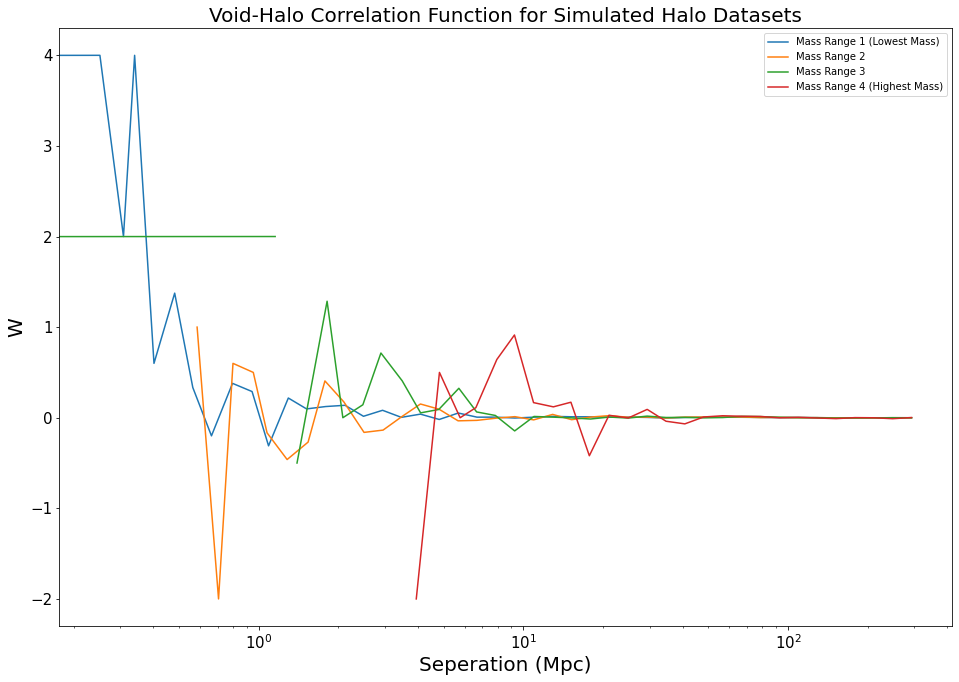

In [25]:
#Plot the data in a log-log plot
plt.figure(figsize=(16,11))

#plt.plot(W_nbdkt[4]['r'],W_nbdkt[4]['corr'])
plt.errorbar(W_voidhalo_1[4]['r'],W_voidhalo_1[4]['corr'], ecolor="purple",capsize=5, label="Mass Range 1 (Lowest Mass)")
plt.errorbar(W_voidhalo_2[4]['r'],W_voidhalo_2[4]['corr'], ecolor="purple",capsize=5, label="Mass Range 2")
plt.errorbar(W_voidhalo_3[4]['r'],W_voidhalo_3[4]['corr'], ecolor="purple",capsize=5, label="Mass Range 3")
plt.errorbar(W_voidhalo_4[4]['r'],W_voidhalo_4[4]['corr'], ecolor="purple",capsize=5, label="Mass Range 4 (Highest Mass)")

#yerr=1/(W_nbdkt[0]['npairs']**0.5)
#yerr=1/(W_nbdkt_axion[0]['npairs']**0.5
        
plt.xscale('log')
plt.legend(loc="upper right", fontsize=10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
plt.title("Void-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.xlabel("Seperation (Mpc)", fontsize=20)
plt.ylabel("W", fontsize=20)
plt.show()

<h1>HALO-HALO CORRELATION CALCULATION</h1>

In [24]:
histogram_bins_3d = np.logspace(-1,2.5)

#W_halohalo_1 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_1, halo_cat_1, halo_cat_1_rand, halo_cat_1_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
#W_halohalo_2 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_2, halo_cat_2, halo_cat_2_rand, halo_cat_2_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
#W_halohalo_3 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_3, halo_cat_3, halo_cat_3_rand, halo_cat_3_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)
#W_halohalo_4 = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_4, halo_cat_4, halo_cat_4_rand, halo_cat_4_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)


<h1>HALO-HALO CORRELATION GRAPH</h1>

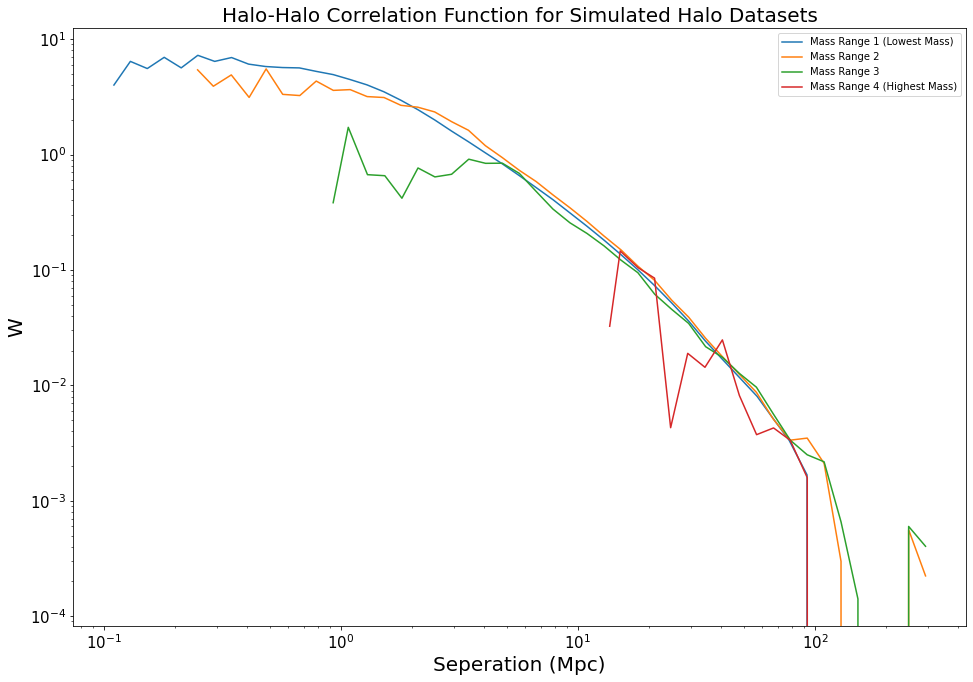

In [37]:
#Plot the data in a log-log plot
plt.figure(figsize=(16,11))

#plt.plot(W_nbdkt[4]['r'],W_nbdkt[4]['corr'])
plt.errorbar(W_halohalo_1[4]['r'],W_halohalo_1[4]['corr'], ecolor="purple",capsize=5, label="Mass Range 1 (Lowest Mass)")
plt.errorbar(W_halohalo_2[4]['r'],W_halohalo_2[4]['corr']/1.6, ecolor="purple",capsize=5, label="Mass Range 2")
plt.errorbar(W_halohalo_3[4]['r'],W_halohalo_3[4]['corr']/5.2315432198300735, ecolor="purple",capsize=5, label="Mass Range 3")
plt.errorbar(W_halohalo_4[4]['r'],W_halohalo_4[4]['corr']/24.671142207506083, ecolor="purple",capsize=5, label="Mass Range 4 (Highest Mass)")

#yerr=1/(W_nbdkt[0]['npairs']**0.5)
#yerr=1/(W_nbdkt_axion[0]['npairs']**0.5
        
plt.xscale('log')
plt.yscale('log')

plt.legend(loc="upper right", fontsize=10)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.xlim(0,120)
#plt.ylim(-0.5,0.2)
plt.title("Halo-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.xlabel("Seperation (Mpc)", fontsize=20)
plt.ylabel("W", fontsize=20)
plt.show()

In [35]:
print(W_halohalo_2[4]['corr'][40]/W_halohalo_1[4]['corr'][40])
print(W_halohalo_3[4]['corr'][40]/W_halohalo_1[4]['corr'][40])
print(W_halohalo_4[4]['corr'][40]/W_halohalo_1[4]['corr'][40])


print()

1.6000089892012366
5.2315432198300735
24.671142207506083



In [53]:
np.random.seed(503)
print(np.random.uniform(10))

9.812629379869279


<h1>SAVE OUT CORRELATION DATA</h1>

In [16]:
np.save("mass bin 1 axion corr", W_halohalo_1[4]['corr'])

<h1>EXTRA</h1>

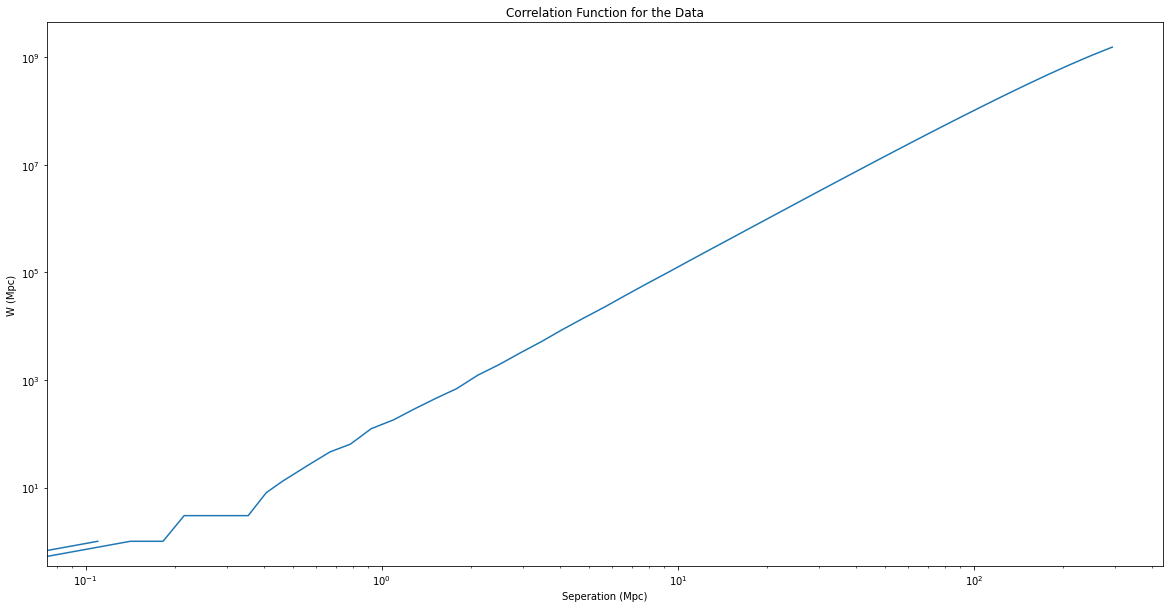

In [78]:
#Plot the data in a log-log plot
plt.figure(figsize=(20,10))
plt.loglog(W_nbdkt[3]['r'],W_nbdkt[3]['npairs'])
#plt.xlim(0,120)
#plt.ylim(-1,0.2)
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

In [81]:
W_nbdkt_self = LandySzalayEstimator(SimulationBoxPairCount, halo_cat, halo_cat, halo_cat_rand, halo_cat_rand, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)

In [82]:
print(W_nbdkt_self)

(<BinnedStatistic: dims: (r: 49), variables: ('r', 'npairs', 'wnpairs')>, <BinnedStatistic: dims: (r: 49), variables: ('r', 'npairs', 'wnpairs')>, <BinnedStatistic: dims: (r: 49), variables: ('r', 'npairs', 'wnpairs')>, <BinnedStatistic: dims: (r: 49), variables: ('r', 'npairs', 'wnpairs')>, <WedgeBinnedStatistic: dims: (r: 49), variables: ('corr', 'r')>)


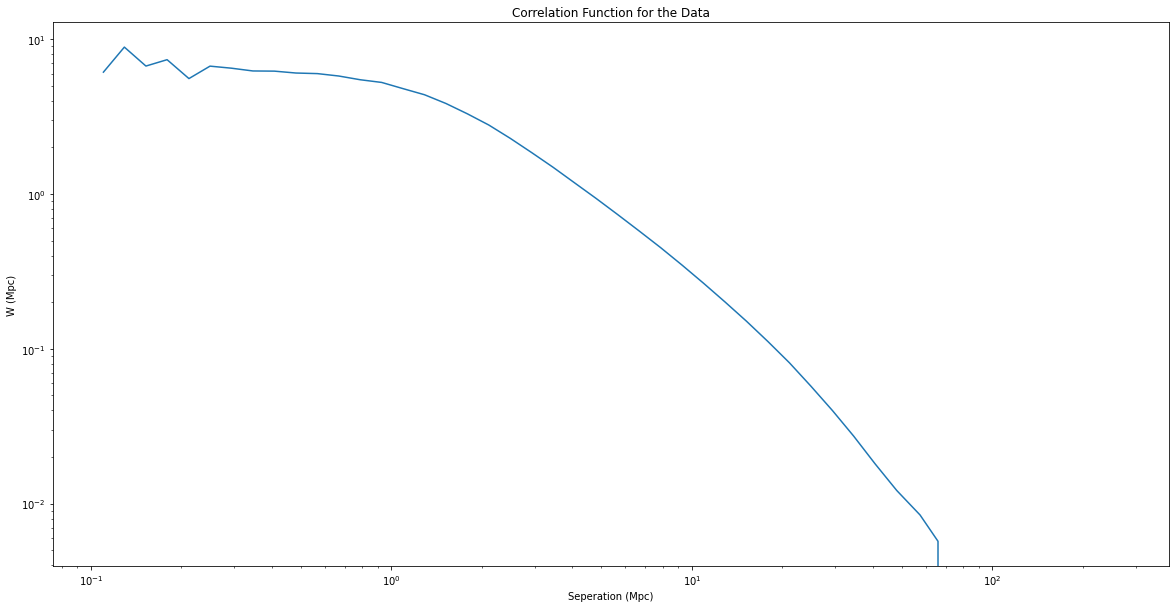

In [96]:
plt.figure(figsize=(20,10))
plt.loglog(W_nbdkt_self[4]['r'],W_nbdkt_self[4]['corr'])
#plt.xlim(0,120)
#plt.ylim(-1,0.2)
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

In [95]:
#np.save("NBDYKT R1R2 X", W_nbdkt_self[3]['r'])

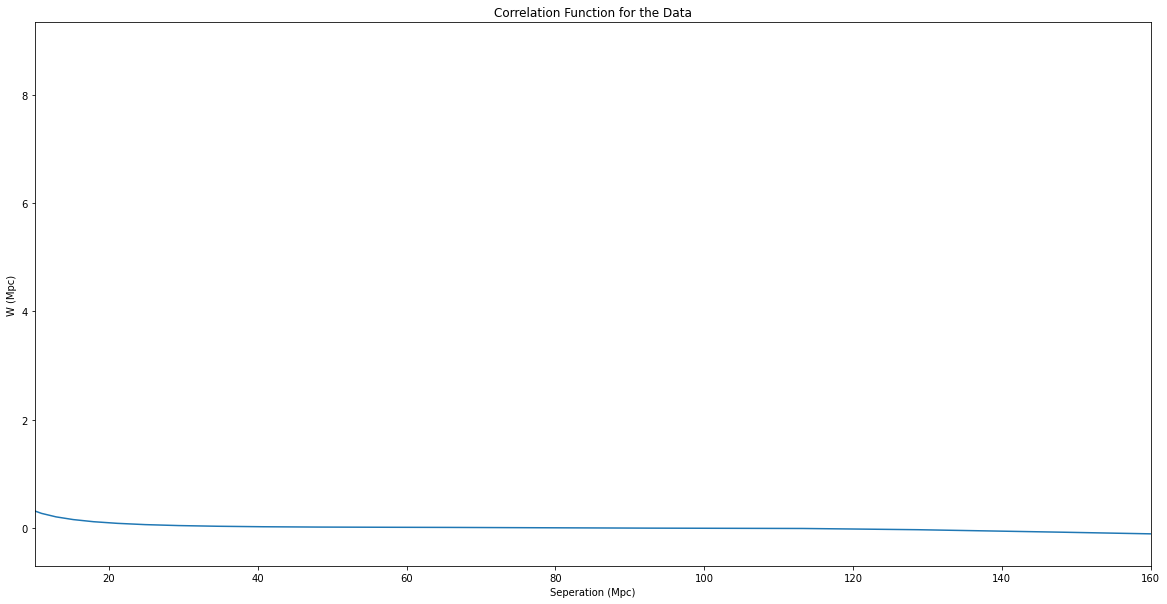

In [111]:
plt.figure(figsize=(20,10))
plt.plot(W_nbdkt_self[4]['r'],W_nbdkt_self[4]['corr'])
plt.xlim(10,160)
#plt.ylim(-0.1,0.1)
#plt.yscale('log')

plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

In [ ]:
#explain cosmic web
#explain what voids are (empty regions)
#talk a bit about axions and how voids can be used to measure large scale structure
#axions are a dark matter candidate
#voids are a piece of the data that's there but not used yet

#

In [11]:
voids_axion = np.load('VoidsAxionRemovedOutliers.npy')
halos_axion = np.load('Trial_PP_halo_catalog_1024Mpc_n2048_1_25_10.npy').T
voids_rand_axion = np.load('voids_random_axion.npy').T
halos_rand_axion = np.load('halos_random_axion.npy').T

void_dict_axion = {}
halo_dict_axion = {}
void_dict_rand_axion = {}
halo_dict_rand_axion = {}

void_dict_axion['Position'] = voids_axion[1:4].T
halo_dict_axion['Position'] = halos_axion[0:3].T
void_dict_rand_axion['Position'] = voids_rand_axion[0:3].T
halo_dict_rand_axion['Position'] = halos_rand_axion[0:3].T

void_cat_axion = catalog.ArrayCatalog(void_dict_axion)
halo_cat_axion = catalog.ArrayCatalog(halo_dict_axion)
void_cat_rand_axion = catalog.ArrayCatalog(void_dict_rand_axion)
halo_cat_rand_axion = catalog.ArrayCatalog(halo_dict_rand_axion)

348.120619


In [117]:
print(halo_cat_axion)
print(void_cat_axion)
print(void_cat_rand_axion)
print(halo_cat_rand_axion)

ArrayCatalog(size=1410661)
ArrayCatalog(size=6643)
ArrayCatalog(size=6643)
ArrayCatalog(size=1410661)


In [12]:
W_nbdkt_axion = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_axion, void_cat_axion, halo_cat_rand_axion, void_cat_rand_axion, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)

/opt/conda/lib/python3.9/site-packages/nbodykit/algorithms/paircount_tpcf/estimators.py:229: UserWarning: The RR calculation in the Landy-Szalay estimator contains separation bins with no bins. This will result in NaN values in the resulting correlation function. Try increasing the number of randoms and/or using broader bins.
  warnings.warn(msg)


/tmp/ipykernel_1743/2630226444.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(W_nbdkt[4]['r'],W_nbdkt[4]['corr'], yerr=1/(W_nbdkt[0]['npairs']**0.5), ecolor="red",capsize=5)


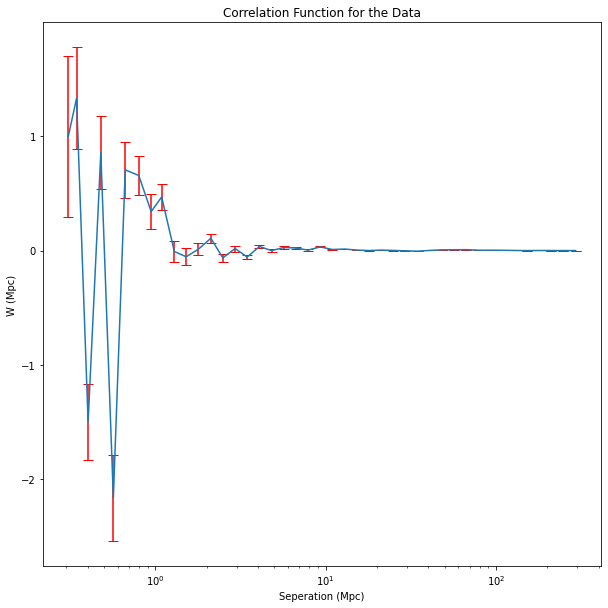

In [120]:
#Plot the data in a log-log plot
plt.figure(figsize=(10,10))
#plt.plot(W_nbdkt[4]['r'],W_nbdkt[4]['corr'])
plt.errorbar(W_nbdkt[4]['r'],W_nbdkt[4]['corr'], yerr=1/(W_nbdkt[0]['npairs']**0.5), ecolor="red",capsize=5)

plt.xscale('log')

#plt.xlim(0,120)
#plt.ylim(-1,0.2)
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

In [130]:
W_nbdkt_self_axion = LandySzalayEstimator(SimulationBoxPairCount, halo_cat_axion, halo_cat_axion, halo_cat_rand_axion, halo_cat_rand_axion, R1R2=None, logger=None, mode='1d', edges=histogram_bins_3d, BoxSize=697, periodic=False, show_progress=True)

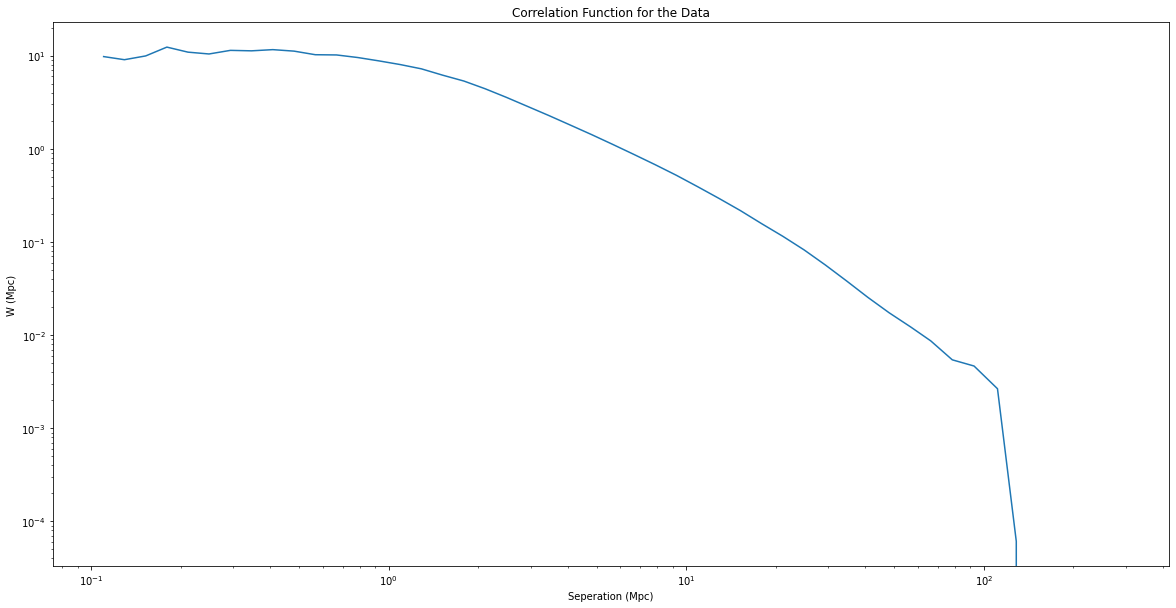

In [151]:
plt.figure(figsize=(20,10))
plt.plot(W_nbdkt_self_axion[4]['r'],W_nbdkt_self_axion[4]['corr'])
#plt.xlim(0.1,160)
#plt.ylim(-0.1,0.1)
plt.yscale('log')
plt.xscale('log')

plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

In [145]:
#np.save("NBDYKT AXION D1D2 X", W_nbdkt_self_axion[0]['r'])

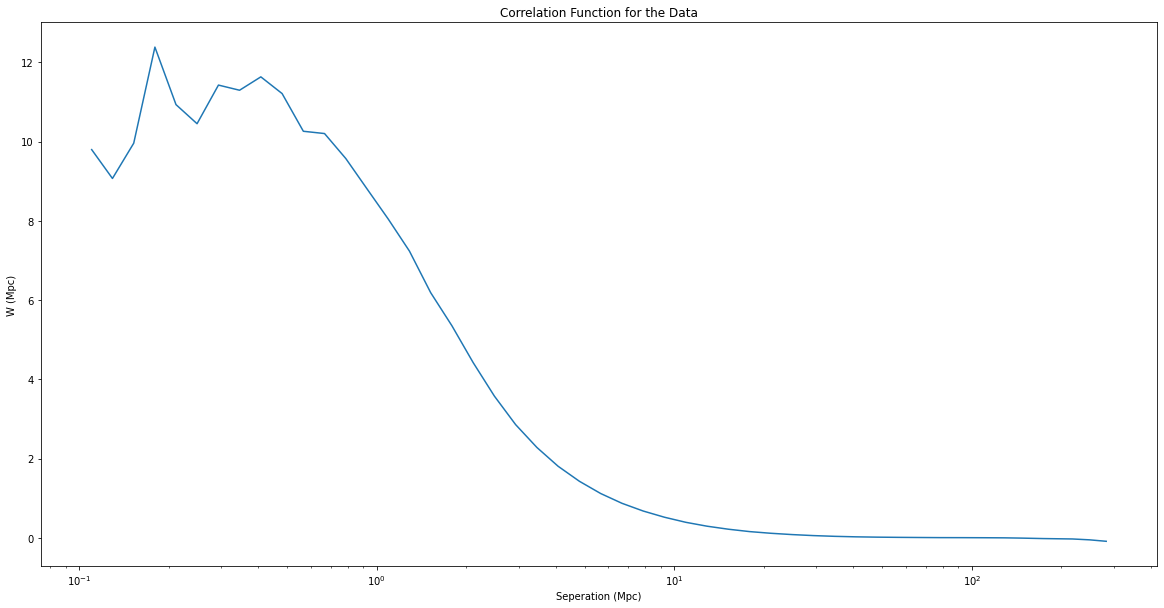

In [147]:
plt.figure(figsize=(20,10))
plt.plot(W_nbdkt_self_axion[4]['r'],W_nbdkt_self_axion[4]['corr'])
#plt.xlim(10,160)
#plt.ylim(-0.1,0.1)
#plt.yscale('log')
plt.xscale('log')

plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

/tmp/ipykernel_62/4103454778.py:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,160)


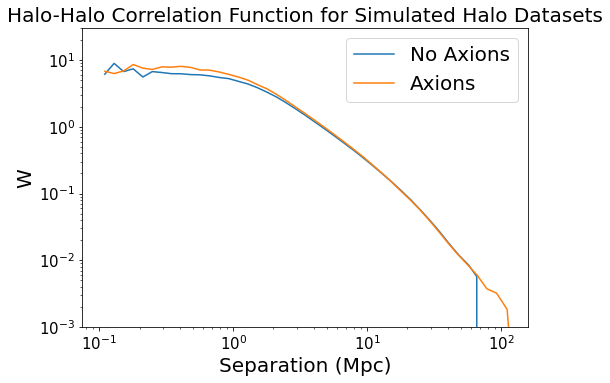

In [6]:
import numpy as np
import matplotlib.pyplot as plt


NBDYKT_CORR = np.load('NBDYKT CORR.npy')
NBDYKT_CORR_X = np.load('NBDYKT CORR X.npy')
NBDYKT_CORR_AXION = np.load('NBDYKT AXION CORR.npy')
NBDYKT_CORR_X_AXION = np.load('NBDYKT AXION CORR X.npy')

NBDYKT_CORR_ERR = np.load('NBDYKT D1D2.npy')
NBDYKT_CORR_ERR_AXION = np.load('NBDYKT AXION D1D2.npy')


#Plot the data in a log-log plot
plt.figure(figsize=(8,5.5))
#plt.plot(W_nbdkt[4]['r'],W_nbdkt[4]['corr'])
plt.errorbar(NBDYKT_CORR_X,NBDYKT_CORR, ecolor="red",capsize=5, label="No Axions")
plt.errorbar(NBDYKT_CORR_X_AXION,NBDYKT_CORR_AXION/1.448296, ecolor="red",capsize=5, label="Axions")

#/1.448296

plt.xscale('log')
plt.yscale('log')
plt.legend(loc="upper right", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.xlim(0,160)
plt.ylim(10**-3,30)
plt.title("Halo-Halo Correlation Function for Simulated Halo Datasets", fontsize=20)
plt.xlabel("Separation (Mpc)", fontsize=20)
plt.ylabel("W", fontsize=20)
plt.show()



In [32]:
#print(NBDYKT_CORR_X[38])

print(NBDYKT_CORR[38])
print(NBDYKT_CORR_AXION[38])

0.008448250653707468
0.012235574189149667


In [ ]:
#EXTRA STUFFZ
histogram_bins_3d = np.logspace(-1,2.5)


DD = SimulationBoxPairCount('1d', halo_cat, histogram_bins_3d, BoxSize=697, periodic=False, second=void_cat, show_progress=True)

RR = SimulationBoxPairCount('1d', halo_cat_rand, histogram_bins_3d, BoxSize=697, periodic=False, second=void_cat_rand, show_progress=True)

RR = SimulationBoxPairCount('1d', halo_cat_rand, histogram_bins_3d, BoxSize=697, periodic=False, second=void_cat_rand, show_progress=True)

print(W_nbdkt)
print(W_nbdkt[4]['corr'])